In [1]:
#!/usr/bin/python
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, math, sys
np.random.seed(88)
os.system('rm *.pdf *.eps *.png');

In [2]:
mu1 = [0,1]
mu2 = [1,0]
cov1 = 0.1*np.identity(2)
cov2 = 0.1*np.identity(2)
def likfunc(X):
    return st.multivariate_normal.pdf(X,mu1,cov1)+ st.multivariate_normal.pdf(X,mu2,cov2)
def priorPdf(X,Ainv):
    return st.multivariate_normal.pdf(X,[0,0],Ainv)
mpl.rcParams.update({'font.size':12})

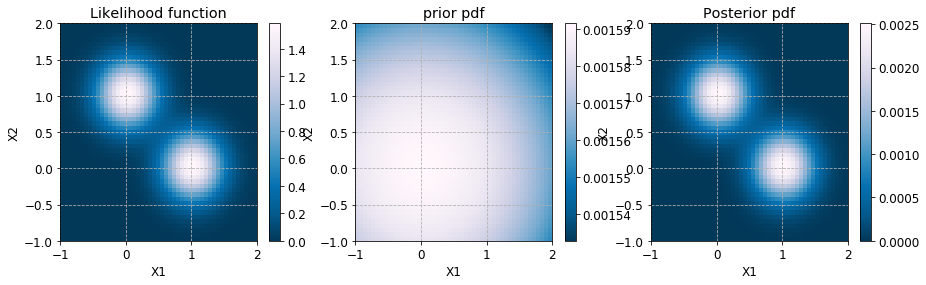

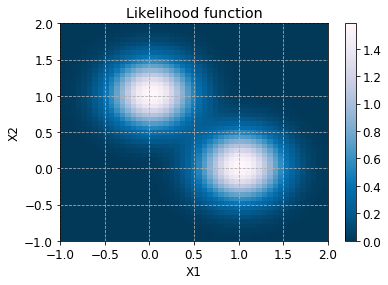

In [17]:
Ngrd = 50
lik = np.zeros((Ngrd,Ngrd))
postr = np.zeros((Ngrd,Ngrd))
prior = np.zeros((Ngrd,Ngrd))
pltAlpha =[-2,-2]
fac = 3
X1bnd = [max(-1,-fac*np.sqrt(1/np.power(10.0,pltAlpha[0]))),min(2,fac*np.sqrt(1/np.power(10.0,pltAlpha[0])))]
X2bnd = [max(-1,-fac*np.sqrt(1/np.power(10.0,pltAlpha[1]))),min(2,fac*np.sqrt(1/np.power(10.0,pltAlpha[1])))]
X1bnd = []
X2bnd = 
X1g = np.linspace(X1bnd[0],X1bnd[1],Ngrd)
X2g = np.linspace(X2bnd[0],X2bnd[1],Ngrd)
X1grd,X2grd = np.meshgrid(X1g,X2g)
for i in range(0,Ngrd):
    for j in range(0,Ngrd):
        Amatinv = np.diag([1/np.power(10.0,pltAlpha[0]),1/np.power(10.0,pltAlpha[1])])
        lik[i,j] = likfunc([X1grd[i,j],X2grd[i,j]])
        prior[i,j] = priorPdf([X1grd[i,j],X2grd[i,j]],Amatinv)
        postr[i,j] = likfunc([X1grd[i,j],X2grd[i,j]])*priorPdf([X1grd[i,j],X2grd[i,j]],Amatinv)
fig=plt.figure(1,figsize=(15,4))
plt.subplot(1, 3, 1)
plt.pcolor(X1grd,X2grd,lik,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Likelihood function')

plt.subplot(1, 3, 2)
plt.pcolor(X1grd,X2grd,prior,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('prior pdf')

plt.subplot(1, 3, 3)
plt.pcolor(X1grd,X2grd,postr,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Posterior pdf')
plt.savefig('evid2d_1.eps',bbox_inches='tight')

fig=plt.figure(2)
plt.pcolor(X1grd,X2grd,lik,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Likelihood function')
plt.savefig('evid2d_0.jpg',bbox_inches='tight')

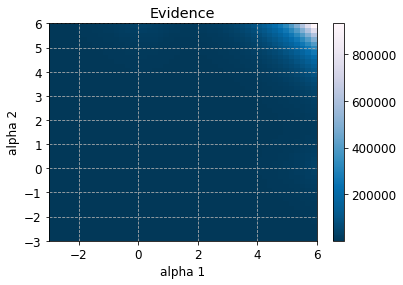

In [4]:
Niter = 50
alpbnd = [-3.0,6.0]
ALP1g = np.linspace(alpbnd[0],alpbnd[1],Niter)
ALP2g = np.linspace(alpbnd[0],alpbnd[1],Niter)
ALP1grd,ALP2grd = np.meshgrid(ALP1g,ALP2g)
evid = np.zeros((Niter,Niter))
for ij in range(0,Niter):
    for jj in range(0,Niter):
        Amatinv = np.diag([1/np.power(10.0,ALP1grd[ij,jj]),1/np.power(10.0,ALP2grd[ij,jj])])
        X1bnd = [max(-1,-fac*np.sqrt(1/np.power(10.0,ALP1grd[ij,jj]))),min(2,fac*np.sqrt(1/np.power(10.0,ALP1grd[ij,jj])))]
        X2bnd = [max(-1,-fac*np.sqrt(1/np.power(10.0,ALP2grd[ij,jj]))),min(2,fac*np.sqrt(1/np.power(10.0,ALP2grd[ij,jj])))]
        X1g = np.linspace(X1bnd[0],X1bnd[1],Ngrd)
        X2g = np.linspace(X2bnd[0],X2bnd[1],Ngrd)
        X1grd,X2grd = np.meshgrid(X1g,X2g)
        for i in range(0,Ngrd):
            for j in range(0,Ngrd):
                postr[i,j] = likfunc([X1grd[i,j],X2grd[i,j]])*priorPdf([X1grd[i,j],X2grd[i,j]],Amatinv)
        evid[ij,jj] = np.sum(postr)
fig=plt.figure(2)
plt.pcolor(ALP1grd,ALP2grd,evid,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('alpha 1')
plt.ylabel('alpha 2')
plt.title('Evidence')
plt.savefig('evid2d_2.eps',bbox_inches='tight')

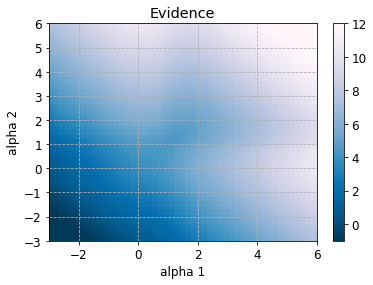

In [15]:
fig=plt.figure(3)
plt.pcolor(ALP1grd,ALP2grd,np.log(evid),cmap='PuBu_r',vmin=-1,vmax=12)
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('alpha 1')
plt.ylabel('alpha 2')
plt.title('Evidence')
plt.savefig('evid2d_2.jpg',bbox_inches='tight')